# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [1]:
from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [2]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [3]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,25,STL,47,44,26,15,3,101,...,2583,26,.591,6,94,6.28,0,0,0,0
1,2,Frederik Andersen,26,ANA,43,37,22,9,7,88,...,2298,24,.649,5,95,4.46,0,1,1,2
2,3,Craig Anderson,34,OTT,60,60,31,23,5,161,...,3477,31,.517,8,99,2.05,0,2,2,0
3,4,Richard Bachman,28,VAN,1,1,1,0,0,3,...,60,0,.000,0,NaN,NaN,0,0,0,0
4,5,Niklas Bäckström,37,CGY,4,3,2,2,0,13,...,233,2,.667,1,NaN,NaN,0,0,0,0


# Section I - Warm-up

Use the given method ift6758.data::get_player_stats to:
1. Sort the goalies by their save percentage (‘SV%’)
2. Produce a bar plot with player names on the y-axis and save percentage (‘SV%’) on the x-axis
3. Save percentage is obviously not a very comprehensive feature. Discuss what other features could potentially be useful in determining a goalie’s performance.

In [4]:
df.columns

Index(['Rk', 'Player', 'Age', 'Tm', 'GP', 'GS', 'W', 'L', 'T/O', 'GA', 'SA',
       'SV', 'SV%', 'GAA', 'SO', 'GPS', 'MIN', 'QS', 'QS%', 'RBS', 'GA%-',
       'GSAA', 'G', 'A', 'PTS', 'PIM'],
      dtype='object')

In [10]:
df[["Rk", "Player", "SV%"]]

,Rk,Player,SV%
0,1,Jake Allen,.920
1,2,Frederik Andersen,.919
2,3,Craig Anderson,.916
3,4,Richard Bachman,.903
4,5,Niklas Bäckström,.881
...,...,...,...
87,90,Scott Wedgewood,.957
88,91,Roman Will,.667
89,92,Jeff Zatkoff,.917
90,65,Anders Nilsson,.901


In [11]:
import matplotlib.pyplot as plt

In [15]:
players = df["Player"].tolist()
players

['Jake Allen',
 'Frederik Andersen',
 'Craig Anderson',
 'Richard Bachman',
 'Niklas Bäckström',
 'Jonathan Bernier',
 'Reto Berra',
 'Jean-Francois Berube',
 'Jordan Binnington',
 'Ben Bishop',
 'Sergei Bobrovsky',
 'Laurent Brossoit',
 'Peter Budaj',
 'Mike Condon',
 'Pheonix Copley',
 'Corey Crawford',
 'Yann Danis',
 'Scott Darling',
 'Louis Domingue',
 'Chris Driedger',
 'Devan Dubnyk',
 'Brian Elliott',
 'Jhonas Enroth',
 'Marc-Andre Fleury',
 'Anton Forsberg',
 'Christopher Gibson',
 'John Gibson',
 'Thomas Greiss',
 'Philipp Grubauer',
 'Kristers Gudlevskis',
 'Jonas Gustavsson',
 'Jaroslav Halak',
 'Andrew Hammond',
 'Magnus Hellberg',
 'Connor Hellebuyck',
 'Jonas Hiller',
 'Braden Holtby',
 'Jimmy Howard',
 'Michael Hutchinson',
 'Carter Hutton',
 'Chad Johnson',
 'Martin Jones',
 'Jason Kasdorf',
 'Anton Khudobin',
 'Keith Kinkaid',
 'Joonas Korpisalo',
 'Darcy Kuemper',
 'Eddie Läck',
 'Robin Lehner',
 'Kari Lehtonen',
 'Michael Leighton',
 'Anders Lindbäck',
 'Charlie Lin

In [17]:
savePercentages = df["SV%"].tolist()
savePercentages 

['.920',
 '.919',
 '.916',
 '.903',
 '.881',
 '.908',
 '.922',
 '.914',
 '.750',
 '.926',
 '.908',
 '.873',
 '.857',
 '.903',
 '.833',
 '.924',
 '.778',
 '.915',
 '.912',
 '1.000',
 '.918',
 '.930',
 '.922',
 '.921',
 '.907',
 '.882',
 '.920',
 '.925',
 '.918',
 '.969',
 '.908',
 '.919',
 '.914',
 '.667',
 '.918',
 '.879',
 '.922',
 '.906',
 '.907',
 '.918',
 '.920',
 '.918',
 '.867',
 '.909',
 '.904',
 '.920',
 '.915',
 '.901',
 '.924',
 '.906',
 '.941',
 '.894',
 '.929',
 '.920',
 '.922',
 '.915',
 '.918',
 '.890',
 '.916',
 '.919',
 '.921',
 '.930',
 '.924',
 '.905',
 '.912',
 '.902',
 '.904',
 '.922',
 '.934',
 '.918',
 '.919',
 '.909',
 '.915',
 '.908',
 '.870',
 '.924',
 '.906',
 '.916',
 '.893',
 '.884',
 '.917',
 '.878',
 '.750',
 '.913',
 '.914',
 '.910',
 '.909',
 '.957',
 '.667',
 '.917',
 '.901',
 '.922']

In [18]:
%matplotlib inline

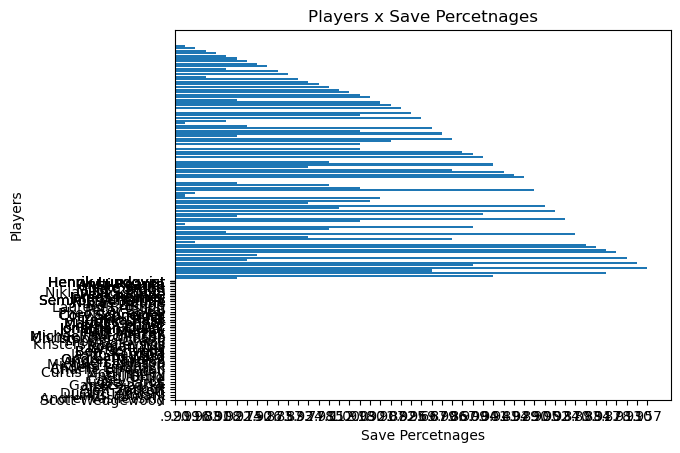

In [20]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(players, savePercentages, align='center')
ax.set_yticks(savePercentages)
ax.set_yticklabels(players)
ax.invert_yaxis()  
ax.set_xlabel('Save Percetnages')
ax.set_ylabel('Players')

ax.set_title('Players x Save Percetnages')

plt.show()

In [23]:
import seaborn as sns
ax = sns.barplot(x="SV%", y="Player", data=df[["Player","SV%"]])

TypeError: Neither the `x` nor `y` variable appears to be numeric.

# Section II - Data Acquisition

1. Create a function or class to download NHL play-by-play data for both the regular season and playoffs. 

The primary endpoint of interest is:

https://statsapi.web.nhl.com/api/v1/game/[GAME_ID]/feed/live/

2. Use your tool to download data from the 2016-17 season all the way up to the 2020-21 season. 

A nice pattern could be to define a function that accepts the target year and a filepath as an argument and then checks at the specified filepath for a file corresponding to the dataset you are going to download. If it exists, it could immediately open up the file and return the saved contents. If not, it could download the contents from the REST API and save it to the file before returning the data. 

3. This means that the first time you run this function, it will automatically download and cache the data locally, and the next time you run the same function, it will instead load the local data. 

4. Consider using environment variables to allow each teammate to specify different locations, and having your function automatically retrieve the location specified by the environment variable so you don’t have to fight about paths in your git repository.

In [5]:
import requests

In [6]:
r = requests.get("https://statsapi.web.nhl.com/api/v1/game/2017020001/feed/live/")
print(r)

<Response [200]>


In [1]:

import requests

class Data:
    
    data_url_format = ''
    
    def __init__(self, data_url_format = 'https://statsapi.web.nhl.com/api/v1/game/{gameId}/feed/live'):
        self.data_url_format = data_url_format
        pass
    
    def getPlayerStats(self):
        try:
            print("Player Status from " + self.data_url_format.format(gameId="10") )
            
        except(e):
            print("Error connecting to API " + e )
            
        else:
            print("Player Status")

        
dataCollector = Data()
dataCollector.getPlayerStats()

Player Status from https://statsapi.web.nhl.com/api/v1/game/10/feed/live
Player Status


# Section III - Interactive Debugging Tool

# Section IV - Tidy Data

# Section V - Simple Visualizations

# Section VI - Advanced Visualizations

# Section VII - Blog Posts